In [1]:
import os
import re
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

In [48]:
classes = [c for c in sorted(os.listdir("Labeled Images/")) if c != ".DS_Store"]

classes =  {c: ix for ix, c in enumerate(classes) }

classes

{'blue_down': 0,
 'blue_six': 1,
 'blue_y': 2,
 'green_circle': 3,
 'green_seven': 4,
 'green_w': 5,
 'red_eight': 6,
 'red_left': 7,
 'red_v': 8,
 'white_nine': 9,
 'white_up': 10,
 'white_x': 11,
 'yellow_right': 12,
 'yellow_z': 13,
 'yellow_zero': 14}

In [62]:
classes_inv = {}

for c in classes:
    
    classes_inv[classes[c]] = c

classes_inv

{0: 'blue_down',
 1: 'blue_six',
 2: 'blue_y',
 3: 'green_circle',
 4: 'green_seven',
 5: 'green_w',
 6: 'red_eight',
 7: 'red_left',
 8: 'red_v',
 9: 'white_nine',
 10: 'white_up',
 11: 'white_x',
 12: 'yellow_right',
 13: 'yellow_z',
 14: 'yellow_zero'}

In [123]:
for class_name in classes:
    print (class_name)

blue_down
blue_six
blue_y
green_circle
green_seven
green_w
red_eight
red_left
red_v
white_nine
white_up
white_x
yellow_right
yellow_z
yellow_zero


In [49]:
for class_name in classes:
    
    for i, file in enumerate(sorted(os.listdir("Labeled Images/" + class_name))):
        print (i//2)
        raw_name , ext = file.split(".")
        print (raw_name, ",", ext)
        
        print (f"Labeled Images/{class_name}/{file}")
        print (f"Labeled Images/{class_name}_{i//2}.{ext}")
        
        os.rename(f"Labeled Images/{class_name}/{file}",
                 f"Labeled Images/{class_name}_{i//2}.{ext}")
        
        if ext == "txt":
            
            f = open(f"Labeled Images/{class_name}_{i//2}.{ext}", "r")
            xml_file = f.read()
            xml_file = xml_file[xml_file.find(" "):]
#             print(xml_file)
            f.close()
            
            f = open(f"Labeled Images/{class_name}_{i//2}.{ext}", "w")
            print(str(classes[class_name]) + xml_file)
            f.write(str(classes[class_name]) + xml_file)
            f.close()

        if i%2!=0:
            print ()
            
    print ()

0
280c6a79-346f-4c54-a763-e022f6f4dc90 , jpg
Labeled Images/blue_down/280c6a79-346f-4c54-a763-e022f6f4dc90.jpg
Labeled Images/blue_down_0.jpg
0
280c6a79-346f-4c54-a763-e022f6f4dc90 , txt
Labeled Images/blue_down/280c6a79-346f-4c54-a763-e022f6f4dc90.txt
Labeled Images/blue_down_0.txt
0 0.659722 0.476595 0.087500 0.125000

1
2d1318d0-c255-488f-abe4-ea25ef02fe1e , jpg
Labeled Images/blue_down/2d1318d0-c255-488f-abe4-ea25ef02fe1e.jpg
Labeled Images/blue_down_1.jpg
1
2d1318d0-c255-488f-abe4-ea25ef02fe1e , txt
Labeled Images/blue_down/2d1318d0-c255-488f-abe4-ea25ef02fe1e.txt
Labeled Images/blue_down_1.txt
0 0.129167 0.458887 0.112500 0.156250

2
2eeebde5-bc46-48aa-b82e-20c883fb6afd , jpg
Labeled Images/blue_down/2eeebde5-bc46-48aa-b82e-20c883fb6afd.jpg
Labeled Images/blue_down_2.jpg
2
2eeebde5-bc46-48aa-b82e-20c883fb6afd , txt
Labeled Images/blue_down/2eeebde5-bc46-48aa-b82e-20c883fb6afd.txt
Labeled Images/blue_down_2.txt
0 0.064236 0.430762 0.128472 0.187500

3
3a07fe6f-7118-4329-b8e5-4c3c3

5 0.055800 0.449078 0.111600 0.204461

1
07b586f3-a596-4a50-ba12-2513539ba0b8 , jpg
Labeled Images/green_w/07b586f3-a596-4a50-ba12-2513539ba0b8.jpg
Labeled Images/green_w_1.jpg
1
07b586f3-a596-4a50-ba12-2513539ba0b8 , txt
Labeled Images/green_w/07b586f3-a596-4a50-ba12-2513539ba0b8.txt
Labeled Images/green_w_1.txt
5 0.514069 0.482536 0.083951 0.115242

2
16391e07-6fa1-42ff-be76-5b7f8eb09066 , jpg
Labeled Images/green_w/16391e07-6fa1-42ff-be76-5b7f8eb09066.jpg
Labeled Images/green_w_2.jpg
2
16391e07-6fa1-42ff-be76-5b7f8eb09066 , txt
Labeled Images/green_w/16391e07-6fa1-42ff-be76-5b7f8eb09066.txt
Labeled Images/green_w_2.txt
5 0.730118 0.445361 0.135802 0.189591

3
1673e4ea-ddf0-4ae5-a69f-5d0713e0c141 , jpg
Labeled Images/green_w/1673e4ea-ddf0-4ae5-a69f-5d0713e0c141.jpg
Labeled Images/green_w_3.jpg
3
1673e4ea-ddf0-4ae5-a69f-5d0713e0c141 , txt
Labeled Images/green_w/1673e4ea-ddf0-4ae5-a69f-5d0713e0c141.txt
Labeled Images/green_w_3.txt
5 0.507896 0.402610 0.190123 0.267658

4
2a72be46-f303-

Labeled Images/white_nine_6.txt
9 0.499327 0.486458 0.079167 0.116667

7
654d0b47-1c67-4930-b0bf-5d1b26ea9094 , jpg
Labeled Images/white_nine/654d0b47-1c67-4930-b0bf-5d1b26ea9094.jpg
Labeled Images/white_nine_7.jpg
7
654d0b47-1c67-4930-b0bf-5d1b26ea9094 , txt
Labeled Images/white_nine/654d0b47-1c67-4930-b0bf-5d1b26ea9094.txt
Labeled Images/white_nine_7.txt
9 0.521549 0.470833 0.098611 0.143750

8
77036c4c-6736-4325-9355-5466fa230681 , jpg
Labeled Images/white_nine/77036c4c-6736-4325-9355-5466fa230681.jpg
Labeled Images/white_nine_8.jpg
8
77036c4c-6736-4325-9355-5466fa230681 , txt
Labeled Images/white_nine/77036c4c-6736-4325-9355-5466fa230681.txt
Labeled Images/white_nine_8.txt
9 0.140994 0.470833 0.093056 0.139583

9
8b5559bb-84bf-4fec-a710-35f3d4748524 , jpg
Labeled Images/white_nine/8b5559bb-84bf-4fec-a710-35f3d4748524.jpg
Labeled Images/white_nine_9.jpg
9
8b5559bb-84bf-4fec-a710-35f3d4748524 , txt
Labeled Images/white_nine/8b5559bb-84bf-4fec-a710-35f3d4748524.txt
Labeled Images/whit

13 0.346770 0.478411 0.086785 0.124260

5
9263339f-091d-4afb-a919-76ef2f2f2827 , jpg
Labeled Images/yellow_z/9263339f-091d-4afb-a919-76ef2f2f2827.jpg
Labeled Images/yellow_z_5.jpg
5
9263339f-091d-4afb-a919-76ef2f2f2827 , txt
Labeled Images/yellow_z/9263339f-091d-4afb-a919-76ef2f2f2827.txt
Labeled Images/yellow_z_5.txt
13 0.485824 0.401489 0.187377 0.284024

6
9307e495-ef8e-4865-b0c6-5be479ae5d10 , jpg
Labeled Images/yellow_z/9307e495-ef8e-4865-b0c6-5be479ae5d10.jpg
Labeled Images/yellow_z_6.jpg
6
9307e495-ef8e-4865-b0c6-5be479ae5d10 , txt
Labeled Images/yellow_z/9307e495-ef8e-4865-b0c6-5be479ae5d10.txt
Labeled Images/yellow_z_6.txt
13 0.530202 0.294980 0.311637 0.485207

7
c765336d-20e1-4338-84e5-1526964e65f7 , jpg
Labeled Images/yellow_z/c765336d-20e1-4338-84e5-1526964e65f7.jpg
Labeled Images/yellow_z_7.jpg
7
c765336d-20e1-4338-84e5-1526964e65f7 , txt
Labeled Images/yellow_z/c765336d-20e1-4338-84e5-1526964e65f7.txt
Labeled Images/yellow_z_7.txt
13 0.147559 0.460660 0.098619 0.147929



## Test Plot

In [83]:
def plot_image(raw_path):

    path = raw_path + ".jpg"# "Labeled Images/blue_down_14.jpg"
    image = cv2.imread(path, cv2.IMREAD_COLOR)

    img_height = image.shape[0]
    img_width = image.shape[1]

    f = open(raw_path + ".txt", "r")#"Labeled Images/blue_down_14.txt", "r")
    class_ix, x_centre, y_centre, width, height = [float(x) for x in f.read().split()]

    x_centre *= img_width
    width*=img_width
    y_centre *= img_height
    height*=img_height

    f.close()


    # Window name in which image is displayed 
    window_name = 'Image'

    # Start coordinate, here (5, 5) 
    # represents the top left corner of rectangle 
    start_point = (int(x_centre-width/2), int(y_centre-height/2))

    # Ending coordinate, here (220, 220) 
    # represents the bottom right corner of rectangle 
    end_point = (int(x_centre+width/2), int(y_centre+height/2))

    print (int(class_ix), classes_inv[int(class_ix)], start_point, end_point)

    # Blue color in BGR 
    color = (255, 0, 0) 

    # Line thickness of 2 px 
    thickness = 5

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)

0 blue_down (479, 159) (574, 252)


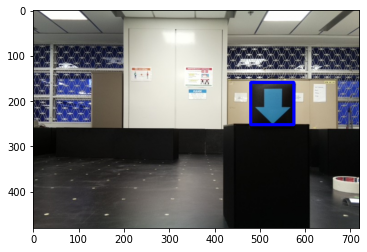

In [101]:
plot_image("new_data/ts/blue_down_14")

1 blue_six (148, 171) (248, 267)


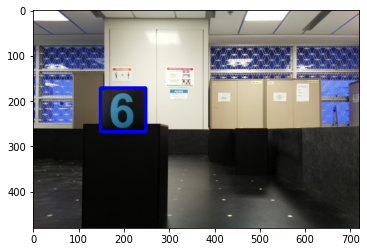

In [102]:
plot_image("new_data/ts/blue_six_15")

2 blue_y (0, 159) (83, 257)


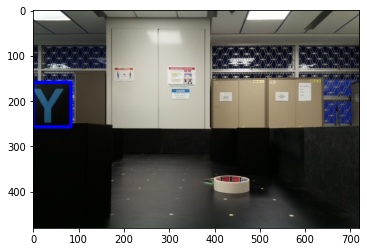

In [103]:
plot_image("new_data/ts/blue_y_10")

3 green_circle (52, 119) (191, 258)


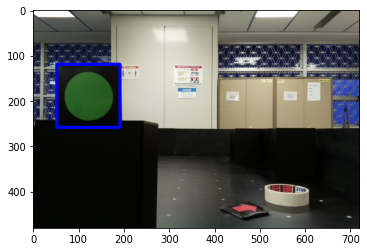

In [104]:
plot_image("new_data/ts/green_circle_2")

4 green_seven (192, 191) (266, 266)


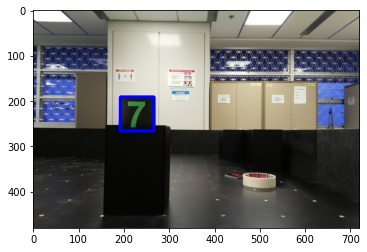

In [105]:
plot_image("new_data/ts/green_seven_13")

5 green_w (0, 166) (80, 264)


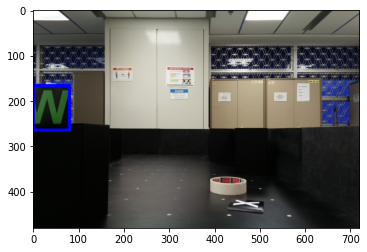

In [106]:
plot_image("new_data/ts/green_w_0")

6 red_eight (195, 189) (268, 260)


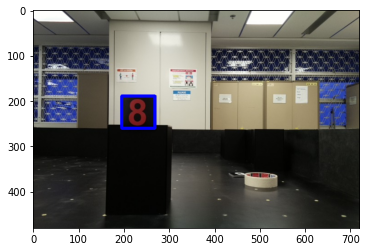

In [107]:
plot_image("new_data/ts/red_eight_3")

7 red_left (191, 186) (271, 250)


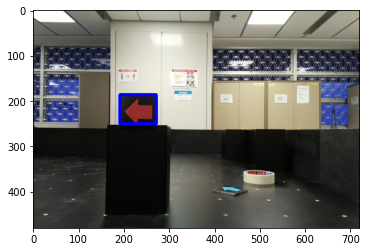

In [108]:
plot_image("new_data/ts/red_left_7")

8 red_v (0, 164) (91, 257)


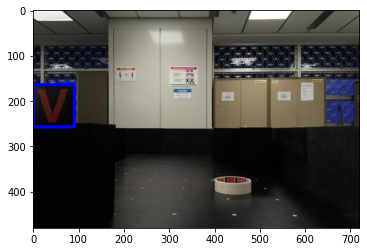

In [109]:
plot_image("new_data/ts/red_v_9")

9 white_nine (269, 34) (490, 261)


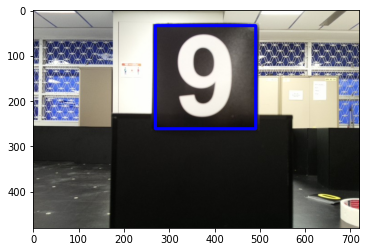

In [110]:
plot_image("new_data/ts/white_nine_1")

10 white_up (454, 189) (528, 266)


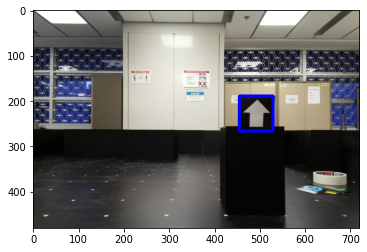

In [111]:
plot_image("new_data/ts/white_up_5")

11 white_x (261, 29) (492, 255)


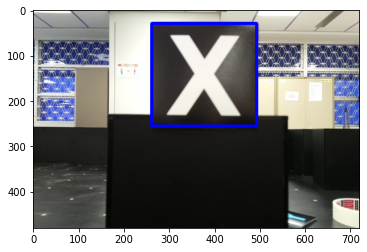

In [112]:
plot_image("new_data/ts/white_x_1")

12 yellow_right (295, 123) (431, 263)


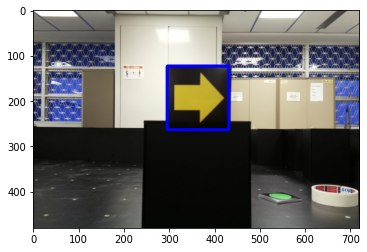

In [113]:
plot_image("new_data/ts/yellow_right_12")

13 yellow_z (452, 188) (528, 269)


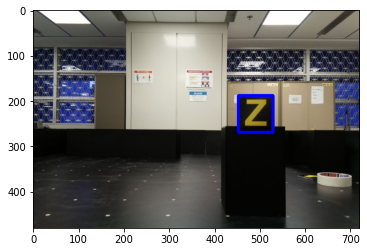

In [117]:
plot_image("new_data/ts/yellow_z_12")

14 yellow_zero (498, 171) (600, 272)


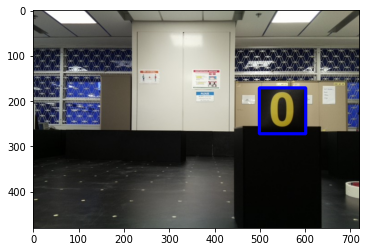

In [115]:
plot_image("new_data/ts/yellow_zero_15")

## Test -Train Spit

In [2]:
file_names_list = []

for file_name in os.listdir("new_data/ts"):
    if ".jpg" in file_name:
        file_names_list.append(file_name)
sorted(file_names_list)

['blue_down_0.jpg',
 'blue_down_1.jpg',
 'blue_down_10.jpg',
 'blue_down_11.jpg',
 'blue_down_12.jpg',
 'blue_down_13.jpg',
 'blue_down_14.jpg',
 'blue_down_15.jpg',
 'blue_down_16.jpg',
 'blue_down_2.jpg',
 'blue_down_3.jpg',
 'blue_down_4.jpg',
 'blue_down_5.jpg',
 'blue_down_6.jpg',
 'blue_down_7.jpg',
 'blue_down_8.jpg',
 'blue_down_9.jpg',
 'blue_six_0.jpg',
 'blue_six_1.jpg',
 'blue_six_10.jpg',
 'blue_six_11.jpg',
 'blue_six_12.jpg',
 'blue_six_13.jpg',
 'blue_six_14.jpg',
 'blue_six_15.jpg',
 'blue_six_16.jpg',
 'blue_six_2.jpg',
 'blue_six_3.jpg',
 'blue_six_4.jpg',
 'blue_six_5.jpg',
 'blue_six_6.jpg',
 'blue_six_7.jpg',
 'blue_six_8.jpg',
 'blue_six_9.jpg',
 'blue_y_0.jpg',
 'blue_y_1.jpg',
 'blue_y_10.jpg',
 'blue_y_11.jpg',
 'blue_y_12.jpg',
 'blue_y_13.jpg',
 'blue_y_14.jpg',
 'blue_y_15.jpg',
 'blue_y_16.jpg',
 'blue_y_2.jpg',
 'blue_y_3.jpg',
 'blue_y_4.jpg',
 'blue_y_5.jpg',
 'blue_y_6.jpg',
 'blue_y_7.jpg',
 'blue_y_8.jpg',
 'blue_y_9.jpg',
 'green_circle_0.jpg',
 'gr

In [3]:
train_files, test_files = train_test_split(file_names_list, test_size=0.2, random_state=42)
len(train_files), len(test_files)

(204, 51)

In [6]:
f = open("new_data/train.txt", "w")
for file in train_files:
    f.write(f"data/ts/{file}\n")
    print (file)
f.close()

green_circle_6.jpg
red_v_5.jpg
red_v_9.jpg
green_w_15.jpg
blue_down_6.jpg
blue_six_14.jpg
white_up_14.jpg
yellow_right_1.jpg
yellow_right_9.jpg
green_seven_14.jpg
blue_y_9.jpg
white_x_3.jpg
white_up_15.jpg
red_v_12.jpg
blue_y_16.jpg
white_x_12.jpg
red_eight_11.jpg
white_x_14.jpg
white_up_9.jpg
yellow_z_3.jpg
white_nine_9.jpg
blue_y_14.jpg
blue_y_2.jpg
green_w_10.jpg
red_left_10.jpg
white_nine_16.jpg
green_seven_6.jpg
yellow_right_16.jpg
red_eight_4.jpg
white_up_2.jpg
green_seven_11.jpg
green_w_11.jpg
red_left_7.jpg
white_nine_12.jpg
white_up_4.jpg
yellow_zero_16.jpg
yellow_z_7.jpg
blue_six_10.jpg
white_up_10.jpg
green_seven_15.jpg
red_v_13.jpg
white_x_0.jpg
yellow_z_10.jpg
red_eight_0.jpg
red_left_3.jpg
white_x_9.jpg
red_left_2.jpg
white_up_8.jpg
yellow_z_11.jpg
red_eight_16.jpg
white_nine_15.jpg
blue_six_1.jpg
red_left_11.jpg
yellow_right_10.jpg
green_circle_11.jpg
green_w_13.jpg
red_eight_15.jpg
white_x_5.jpg
white_nine_11.jpg
red_eight_7.jpg
green_w_5.jpg
white_nine_1.jpg
blue_y_5.j

In [7]:
f = open("new_data/test.txt", "w")
for file in test_files:
    f.write(f"data/ts/{file}\n")
    print (file)
f.close()

blue_six_3.jpg
red_eight_2.jpg
yellow_right_12.jpg
red_left_15.jpg
blue_y_3.jpg
red_eight_13.jpg
blue_y_11.jpg
yellow_zero_12.jpg
yellow_zero_7.jpg
red_left_1.jpg
red_v_1.jpg
green_circle_8.jpg
green_circle_10.jpg
red_left_16.jpg
white_nine_2.jpg
blue_down_16.jpg
red_eight_12.jpg
green_circle_1.jpg
blue_six_8.jpg
red_eight_5.jpg
blue_down_3.jpg
yellow_z_15.jpg
blue_down_11.jpg
white_up_6.jpg
yellow_zero_1.jpg
yellow_z_1.jpg
green_circle_12.jpg
green_circle_13.jpg
yellow_z_14.jpg
white_up_13.jpg
yellow_z_4.jpg
white_x_10.jpg
yellow_right_2.jpg
blue_down_4.jpg
blue_down_7.jpg
white_x_8.jpg
blue_down_13.jpg
green_seven_8.jpg
green_w_16.jpg
green_w_9.jpg
yellow_right_5.jpg
white_nine_4.jpg
red_left_8.jpg
blue_y_12.jpg
blue_six_11.jpg
blue_six_12.jpg
red_left_4.jpg
green_seven_10.jpg
blue_down_5.jpg
red_v_2.jpg
white_up_12.jpg
